In [1]:
# 미션 진행을 위해 필요한 라이브러리 로드합니다.
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# 미션 수행을 위해 데이터를 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [5]:
# 데이터 프레임에서 가장 앞에 있는 N개의 행을 출력합니다.
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
# 데이터 집합과 각 열들의 자료형을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [8]:
# df.isnull().sum()는 컬럼별로 결측치의 합계를 구합니다.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# df.isnull().sum().sum() 전체 결측치의 합계를 구합니다.
df.isnull().sum().sum()

0

In [ ]:
# 숫자형태로 된 문자열을 숫자형으로 바꿔줍니다.
# 공백문자 등의 결측치가 들어있다면 .str.strip()을 통해 공백문자를 제거합니다.
# .replace("", np.nan) 는 공백문자를 결측치로 변경해 줍니다.
# .astype(float) 으로 수치형태로 변환해 줍니다.
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

In [16]:
# 바이너리 변수 인코딩을 위해 범주 값이 2개로 되어 있어 이진값으로 인코딩이 가능한 변수를 찾습니다.
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [18]:
df[bi_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes,No
5575-GNVDE,Male,0,No,No,Yes,No,No
3668-QPYBK,Male,0,No,No,Yes,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,No
4801-JZAZL,Female,0,Yes,Yes,No,Yes,No


In [19]:
# 바이너리 변수에 대한 인코딩
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


In [20]:
# 정답의 빈도수 확인
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [21]:
# value_counts(1) => normalize=True 와 같습니다.
df["Churn"].value_counts(1)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

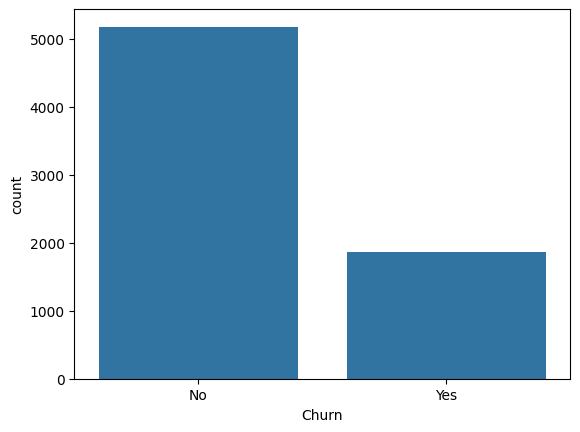

In [22]:
sns.countplot(data=df, x="Churn")

In [23]:
# 학습, 예측에 사용할 컬럼에 이름 지정합니다.
# 범주형 데이터(object, category)는 전처리가 따로 필요합니다.
# 간단하게 모델을 만들어보기 위해 수치 데이터만 사용합니다.
feature_names = df.select_dtypes(include="number").columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')

In [24]:
# label_name 이라는 변수에 예측할 컬럼(Churn)의 이름을 담습니다.
label_name = "Churn"
label_name

'Churn'

In [26]:
# X, y를 만들어 줍니다.
# 물음표를 채워 독립변수(X)와 종속변수(y)를 나눠주세요.
# scikit-learn에서 데이터는 대문자 X(2차원,행렬)로 표시하고 정답은 소문자 y(1차원,벡터)로 표기합니다.
X = df[feature_names]
y = df[label_name]
display(X.head(2))
display(y.head(2))
X.shape, y.shape

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

((7043, 9), (7043,))

In [27]:
# 데이터의 행과 열의 개수를 확인합니다.
df.shape

(7043, 25)

In [29]:
# train 과 test 로 나누기 위해 데이터를 기준을 정합니다.
split_count = int(df.shape[0] * 0.8)
split_count

5634

In [33]:
# 데이터의 80%을 나눌 기준 인덱스(split_count)로 문제 데이터(X)를 train, test로 나눕니다.
# 데이터의 80%을 나눌 기준 인덱스(split_count)로 정답 데이터(y)를 train, test로 나눕니다.
X_train = X[:split_count]
y_train = y[:split_count]

X_test = X[:split_count]
y_test = y[:split_count]

print("* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.


((5634, 9), (5634, 9), (5634,), (5634,))

In [31]:
# 사이킷런(sklearn)에서 의사 결정 트리 분류모델(DecisionTreeClassifier)을 로드합니다.
# 위 설명에서 제시한 주요 파라미터의 설정을 변경해서 모델을 만들어 주세요.
# 기본값으로 모델을 만들어도 되며 여러 파라미터를 변경하는 방법으로 만들어도 됩니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [34]:
# 데이터를 머신러닝 모델로 학습(fit)합니다.
# 기출문제 X_train 와 기출문제의 정답 y_train 을 넣고 학습을 합니다.
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# 데이터를 머신러닝 모델로 예측(predict)합니다.
y_predict = model.predict(X_test)
y_predict[:5]

array(['Yes', 'No', 'No', 'No', 'Yes'], dtype=object)

[Text(0.38292630798163024, 0.9928571428571429, 'tenure <= 16.5\ngini = 0.389\nsamples = 5634\nvalue = [4146, 1488]'),
 Text(0.1411455589939426, 0.9785714285714285, 'MonthlyCharges <= 69.225\ngini = 0.495\nsamples = 2048\nvalue = [1122, 926]'),
 Text(0.06763563339478536, 0.9642857142857143, 'tenure <= 3.5\ngini = 0.418\nsamples = 1142\nvalue = [805, 337]'),
 Text(0.04065709770871741, 0.95, 'MonthlyCharges <= 20.875\ngini = 0.489\nsamples = 502\nvalue = [288, 214]'),
 Text(0.021595996839610217, 0.9357142857142857, 'TotalCharges <= 20.275\ngini = 0.387\nsamples = 187\nvalue = [138, 49]'),
 Text(0.014748485646563076, 0.9214285714285714, 'TotalCharges <= 19.275\ngini = 0.469\nsamples = 96\nvalue = [60, 36]'),
 Text(0.012641559125625495, 0.9071428571428571, 'gender_encode <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.011588095865156703, 0.8928571428571429, 'TotalCharges <= 19.05\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.010534632604687911, 0.8785714285714286, 'gi

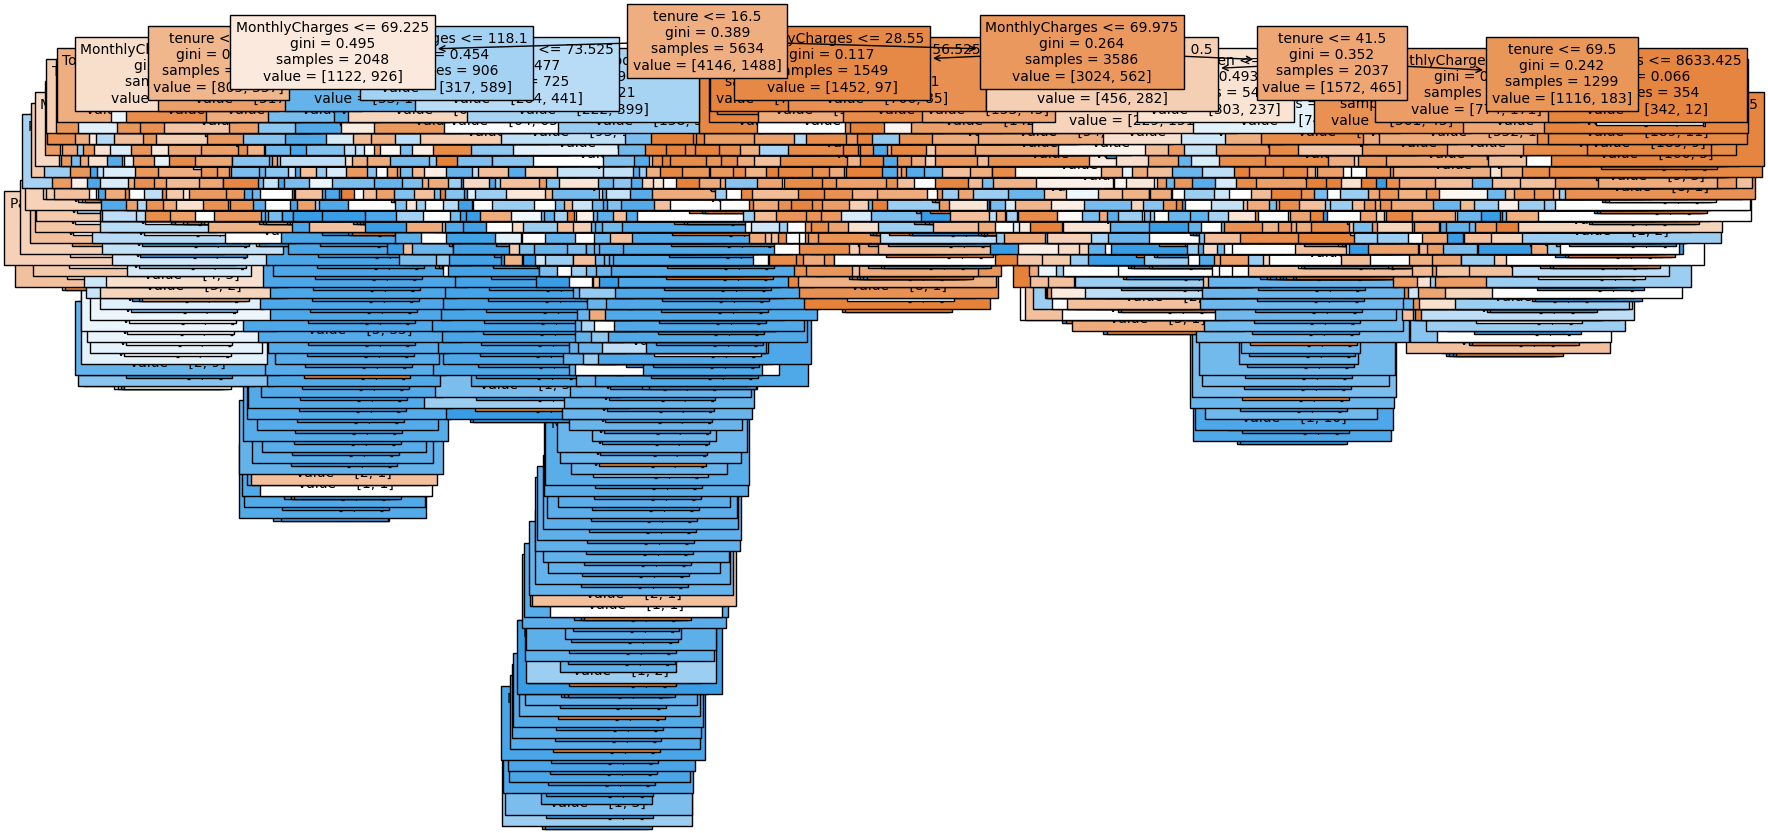

In [36]:
# plot_tree 를 통해 tree 를 시각화 합니다.
# 시각화 할 때만 max_depth를 제한한것이고 실제 모델에서는 다른 값을 사용하게 됩니다.
# 위 예시 이미지를 참고합니다.
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
# 여기에 구현해 주세요.
plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

[Text(0.38292630798163024, 0.9928571428571429, 'tenure <= 16.5\ngini = 0.389\nsamples = 5634\nvalue = [4146, 1488]'),
 Text(0.1411455589939426, 0.9785714285714285, 'MonthlyCharges <= 69.225\ngini = 0.495\nsamples = 2048\nvalue = [1122, 926]'),
 Text(0.06763563339478536, 0.9642857142857143, 'tenure <= 3.5\ngini = 0.418\nsamples = 1142\nvalue = [805, 337]'),
 Text(0.04065709770871741, 0.95, 'MonthlyCharges <= 20.875\ngini = 0.489\nsamples = 502\nvalue = [288, 214]'),
 Text(0.021595996839610217, 0.9357142857142857, 'TotalCharges <= 20.275\ngini = 0.387\nsamples = 187\nvalue = [138, 49]'),
 Text(0.014748485646563076, 0.9214285714285714, 'TotalCharges <= 19.275\ngini = 0.469\nsamples = 96\nvalue = [60, 36]'),
 Text(0.012641559125625495, 0.9071428571428571, 'gender_encode <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.011588095865156703, 0.8928571428571429, 'TotalCharges <= 19.05\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.010534632604687911, 0.8785714285714286, 'gi

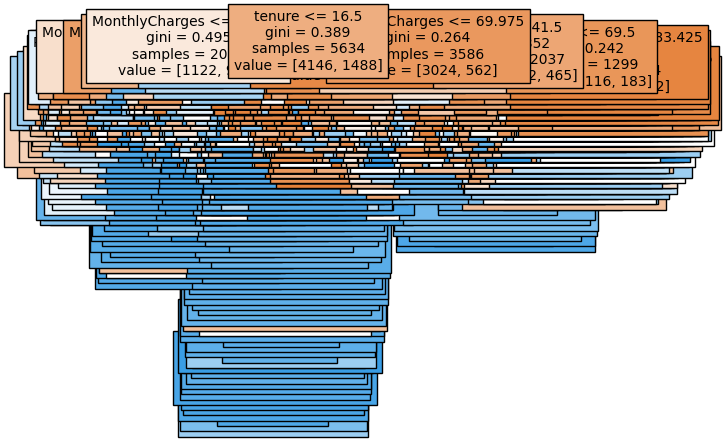

In [37]:
# export_text 를 통해 문자( text )로 트리를 시각화 합니다.
# 너무 길어 한눈에 보기가 어려울 경우, max_depth 를 설정하면 특정 깊이까지만 보입니다.
from sklearn.tree import export_text

# 여기에 구현해 주세요.
plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [38]:
# feature_importances_ 를 통해 모델의 피처 중요도를 추출합니다.

model.feature_importances_

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.00205389,        nan])

<Axes: ylabel='None'>

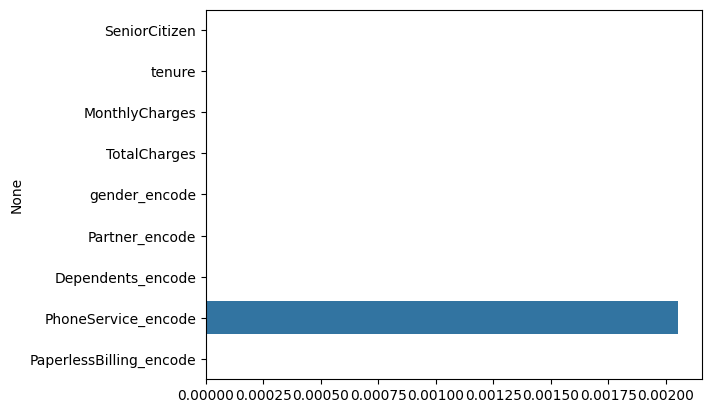

In [39]:
# 피처 중요도를 시각화 합니다.
# 여기에 구현해 주세요. 위 예시 이미지를 참고합니다.

sns.barplot(x=model.feature_importances_,y=feature_names)

In [40]:
# 빈칸을 채워 정확도(accuracy) 를 구해주세요.
# 정답과 같이 예측한 값은 True 로 나오게 됩니다.
# True == 1 이기 때문에 평균값을 내면 정답을 맞춘 비율을 구할 수 있습니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9424920127795527